In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Exploring Movies and Ratings

In [5]:
n_ratings = ratings.shape[0]
n_movies = movies['movieId'].nunique()
n_users = ratings['userId'].nunique()

print('Number of ratings# ', n_ratings)
print('Number of movies# ', n_movies)
print('Number of users# ', n_users)

Number of ratings#  100836
Number of movies#  9742
Number of users#  610


### The Distribution of ratings

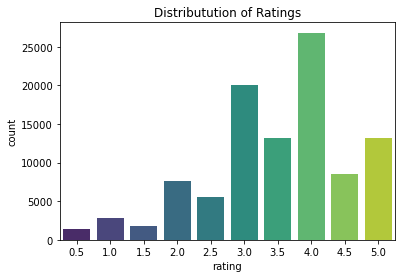

In [6]:
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distributution of Ratings')
plt.show()

In [7]:
mean_rating = ratings['rating'].mean()
print('The Average Rating is ', round(mean_rating, 2))

The Average Rating is  3.5


In [8]:
mean_ratings_users = ratings.groupby('userId').mean()
mean_ratings_per_user = mean_ratings_users['rating'].mean()
print('The Average Rating Per User is ', round(mean_ratings_per_user, 2))

The Average Rating Per User is  3.66


### Info about movies

In [9]:
movies_ratings = ratings.merge(movies, on='movieId')
average_rating_per_movie = movies_ratings.groupby('movieId')['rating'].mean()
average_movie_rating = average_rating_per_movie.mean()
print('Average Movie Rating is ', round(average_movie_rating, 2))

Average Movie Rating is  3.26


### Get The Most rated movie

In [10]:
num_ratings_movies = movies_ratings.groupby('movieId').size()
most_rated_movie_id = num_ratings_movies.idxmax()
most_rating_number = num_ratings_movies.max()
most_rated_movie_name = movies[movies.movieId == most_rated_movie_id]['title']
print('The Most Rated Movie is ', most_rated_movie_name)
print('The Ratings number is ', most_rating_number)

The Most Rated Movie is  314    Forrest Gump (1994)
Name: title, dtype: object
The Ratings number is  329


### Forrest Gump (1994)  is the most Rated Movie

## Get the Highest Rated Movie

In [11]:
movie_rating_averages = movies_ratings.groupby('movieId')['rating'].mean()
highest_rated_movie_id = movie_rating_averages.idxmax()
its_rating = movie_rating_averages.max()
highest_rated_movie_name = movies[movies.movieId == highest_rated_movie_id].title
number_of_ratings = num_ratings_movies[num_ratings_movies.index == highest_rated_movie_id]
print('The Highest Rated Movie is ', highest_rated_movie_name)
print('Its Rating is ', its_rating)
print('Its number of ratings is ',number_of_ratings )

The Highest Rated Movie is  48    Lamerica (1994)
Name: title, dtype: object
Its Rating is  5.0
Its number of ratings is  movieId
53    2
dtype: int64


#### This could be misleading as it was only rated for 2 times and we cannpt rely on this number

### We could utilize the bayesian average

In [12]:
movie_rate_count_mean = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

In [13]:
C = movie_rate_count_mean['count'].mean() #Average number of ratings
m = movie_rate_count_mean['mean'].mean() #Average rating

def calc_bayes_avg(df):
    bayes_avg = (C*m+df.sum())/(C+df.count())
    return round(bayes_avg, 3)

In [14]:
lamerica = pd.Series([5, 5])
calc_bayes_avg(lamerica)

3.543

### Lamerica using bayes_avg gets only 3.54 rating

## Calculating Bayesian Average for all movies

In [15]:
movie_rating_avg = ratings.groupby('movieId')['rating'].agg(calc_bayes_avg).reset_index()

In [16]:
movie_rating_avg.head()

,movieId,rating
0,1,3.891
1,2,3.417
2,3,3.260
3,4,2.898
4,5,3.105


In [17]:
movie_rate_count_mean = movie_rate_count_mean.merge(movie_rating_avg, on='movieId')

In [18]:
movie_rate_count_mean  =movie_rate_count_mean.merge(movies, on='movieId')

In [19]:
movie_rate_count_mean.head()

,movieId,count,mean,rating,title,genres
0,1,215,3.920930,3.891,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,3.417,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,3.260,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,2.898,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,3.105,Father of the Bride Part II (1995),Comedy


In [20]:
movie_rating_avg.head()

,movieId,rating
0,1,3.891
1,2,3.417
2,3,3.260
3,4,2.898
4,5,3.105


## rating is the bayesian average for the given movie

### Now we can see the highest rated movie

In [21]:
movie_rate_count_mean.sort_values('rating', ascending=False)

,movieId,count,mean,rating,title,genres
277,318,317,4.429022,4.392,"Shawshank Redemption, The (1994)",Crime|Drama
659,858,192,4.289062,4.236,"Godfather, The (1972)",Crime|Drama
2224,2959,218,4.272936,4.227,Fight Club (1999),Action|Crime|Drama|Thriller
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
1988,2643,16,1.687500,2.307,Superman IV: The Quest for Peace (1987),Action|Adventure|Sci-Fi
1144,1499,27,1.925926,2.297,Anaconda (1997),Action|Adventure|Thriller
1372,1882,33,1.954545,2.267,Godzilla (1998),Action|Sci-Fi|Thriller
2679,3593,19,1.657895,2.224,Battlefield Earth (2000),Action|Sci-Fi


## The highest rated movie is Shawshank Redemption, The (1994)

## dealing with Movie Genres

In [22]:
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


## Using Collaborative Filtering

In [23]:
from scipy.sparse import csr_matrix

def create_X(df):
    
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [24]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [25]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

## use KNearestNeighbors to find similar movies based on users recommendations

In [27]:
from sklearn.neighbors import NearestNeighbors

In [31]:
def get_similar_movies(movieId, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbor_movies_ids = []
    movieIndex = movie_mapper[movieId]
    movieRates = X[movieIndex]
    
    if isinstance(movieRates, (np.ndarray)):
        movieRates = movieRates.reshape(1,-1)
        
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movieRates, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbor_movies_ids.append(movie_inv_mapper[n])
    neighbor_movies_ids.pop(0)
    return neighbor_movies_ids


In [33]:
print(movies[movies['movieId'] == 1]['title'])

0    Toy Story (1995)
Name: title, dtype: object


In [32]:
similar_movies = get_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

In [34]:
print(movies[movies['movieId'].isin([3114, 480, 780, 260, 356, 364, 1210, 648, 1265])])

      movieId                                              title  \
224       260          Star Wars: Episode IV - A New Hope (1977)   
314       356                                Forrest Gump (1994)   
322       364                              Lion King, The (1994)   
418       480                               Jurassic Park (1993)   
546       648                         Mission: Impossible (1996)   
615       780               Independence Day (a.k.a. ID4) (1996)   
911      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
964      1265                               Groundhog Day (1993)   
2355     3114                                 Toy Story 2 (1999)   

                                                 genres  
224                         [Action, Adventure, Sci-Fi]  
314                       [Comedy, Drama, Romance, War]  
322   [Adventure, Animation, Children, Drama, Musica...  
418               [Action, Adventure, Sci-Fi, Thriller]  
546              [Action, Adv

### The Above Movies are the 10 nearest to Toy Story (1995) based on user ratings

## Dealing With Cold start problem

In [37]:
genres = set(g for G in movies['genres'] for g in G)

In [38]:
#assign existing or non for each movie in movies
for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))

In [39]:
movie_genres = movies.drop(columns=['movieId', 'title','genres'])

### We use cosine similarity among movies to find the closest match for a user who watched a given movie

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)

In [41]:
title = 'Jumanji (1995)'
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]

In [42]:
idx

1

In [43]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

### Now we got a 10 similar movies for jumanji 

In [44]:
movies['title'].iloc[similar_movies]

53                     Indian in the Cupboard, The (1995)
109                     NeverEnding Story III, The (1994)
767                       Escape to Witch Mountain (1975)
1514            Darby O'Gill and the Little People (1959)
1556                                  Return to Oz (1985)
1617                        NeverEnding Story, The (1984)
1618    NeverEnding Story II: The Next Chapter, The (1...
1799                        Santa Claus: The Movie (1985)
3574    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075    Chronicles of Narnia: The Lion, the Witch and ...
Name: title, dtype: object